<DIV ALIGN=CENTER>

# Naive Bayes
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore how to effectively use the Naive Bayes algorithm. First, we repeat the analysis of the Iris data used for both k-nn and svm in the Introduction to Machine Learning Notebook from Week 1, but now we use the Naive Bayes algorithm.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(style="white")

# Convenience function to plot confusion matrix

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):
    # Define names for the three Iris types
    names = ['setosa', 'versicolor', 'virginica']

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=3)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=names, columns=names )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

-----

## Iris Data

As the previous figure illustrates, the three types of Iris cluster
naturally in these dimensions, with minimal overlap. As a result, these
data provide an excellent test for different machine learning
algorithms.  The four primary dimensions of the data include Sepal
Length, Sepal Width, Petal Length, and Petal Width, which can be seen
from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

In [2]:
# Load the Iris Data
iris = sns.load_dataset("iris")

# Now lets get the data and labels

data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = np.array([i//50 for i in range(iris.shape[0])])

# We want to split our data into training and testing

from sklearn import cross_validation

# This is the amount to hold out for 'blind' testing
frac = 0.4

d_train, d_test, l_train, l_test \
    = cross_validation.train_test_split(data, labels, test_size=frac, random_state=0)

-----

## [Naive Bayes][nb] (NB)

The first algorithm we will explore is one of the simplest, the
[Naive Bayes][nb] algorithm. Fundamentally, this algorithm is
remarkable simple and is based on the assumption of indepedence that a given attribute (or feature) belongs to a specific class.

In the following code cells, we demonstrate how to perform nb
classification by using scikit-learn. The standard classification
process in scikit-learn is to first fit a model to the training data
and to subsequently apply this model to predict values for the testing
data. After this process, we first compute the prediction score before
displaying the confusion matrix for this algorithm.

-----

[nb]: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [6]:
# First, lets try Gaussain NB
from sklearn.naive_bayes import GaussianNB

# First we construct our Classification Model
nb = GaussianNB()
# Next we train our model
nb.fit(d_train, l_train)

# Finally, we test our model
result = nb.predict(d_test)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * nb.score(d_test, l_test)))

NB prediction accuracy =  93.3%


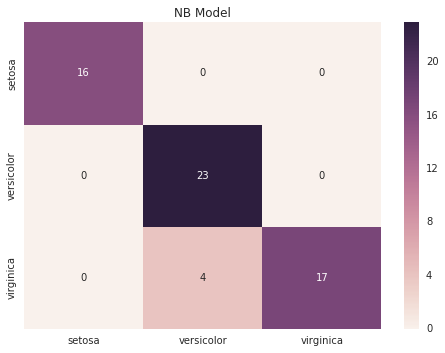

In [7]:
# Plot our confusion matrix

confusion(l_test, result, "NB Model")